In [9]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import openpyxl

# Zadanie

Dysponujesz danymi z portalu Our World in Data dotyczącymi:
- Pierwotnej konsumpcji energii
- Emisji CO2 z poszczególnych lat dla różnych krajów

## Część 1: Plik CSV
Utwórz plik CSV zawierający połączone dane dla Polski:
- konsumpcja energii pierwotnej
- emisja CO2
- dane z poszczególnych lat

## Część 2: Plik Excel
Stwórz plik Excel z osobnymi zakładkami dla każdego kraju:
- UE
- USA
- Chiny
- Indie

Każda zakładka powinna zawierać dane o konsumpcji energii i emisji CO2.

## Część 3: Baza danych SQLite
Utwórz bazę danych SQLite z tabelą zawierającą:
- kraj
- rok
- emisja CO2
- konsumpcja energii

Dane powinny obejmować: Polskę, Niemcy i Hiszpanię.

## Część 4: Analiza i wizualizacja
Na podstawie danych z pliku Excel i bazy SQLite utwórz wykresy:
- emisja CO2 w zależności od roku (dla wybranego kraju)
- konsumpcja energii pierwotnej w zależności od roku (dla wybranego kraju)
- **dla chęnych szukanie koreacji**

In [2]:
from google.colab import files

uploaded = files.upload()

Saving co2-emissions-per-capita.csv to co2-emissions-per-capita.csv
Saving primary-energy-cons.csv to primary-energy-cons.csv


In [3]:
df_co2 = pd.read_csv("co2-emissions-per-capita.csv")
df_co2.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [4]:
df_primary_energy = pd.read_csv("primary-energy-cons.csv")
df_primary_energy.head()

,Entity,Code,Year,Primary energy consumption (TWh)
0,Afghanistan,AFG,1980,6.337187
1,Afghanistan,AFG,1981,7.289555
2,Afghanistan,AFG,1982,7.889244
3,Afghanistan,AFG,1983,9.882159
4,Afghanistan,AFG,1984,9.929878


Część 1

In [7]:
df_pl = pd.merge(df_primary_energy, df_co2, on=['Entity', 'Year'])
df_pl = df_pl[df_pl['Entity'] == 'Poland']
df_pl.head()

,Entity,Code,Year,Primary energy consumption (TWh),Annual CO₂ emissions (per capita)
7387,Poland,POL,1965,776.05330,7.893703
7388,Poland,POL,1966,791.17820,7.996349
7389,Poland,POL,1967,814.29987,8.138128
7390,Poland,POL,1968,876.36676,8.597721
7391,Poland,POL,1969,936.06604,9.076116


Część 2

In [11]:
df_merged = pd.merge(df_primary_energy, df_co2, on=['Entity', 'Year'])

In [16]:
df_ue = df_merged[df_merged['Entity'] == 'European Union (27)']
df_usa = df_merged[df_merged['Entity'] == 'United States']
df_ch = df_merged[df_merged['Entity'] == 'China']
df_in = df_merged[df_merged['Entity'] == 'India']


In [18]:
with pd.ExcelWriter("countries_energy_co2.xlsx") as writer:
    df_ue.to_excel(writer, sheet_name="UE", index=False)
    df_usa.to_excel(writer, sheet_name="USA", index=False)
    df_ch.to_excel(writer, sheet_name="Chiny", index=False)
    df_in.to_excel(writer, sheet_name="Indie", index=False)

Część 3

In [23]:
conn = sqlite3.connect('energy_co2.db')
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE energy_co2 (
    country TEXT,
    year INTEGER,
    co2_emission REAL,
    primary_energy_consumption REAL
)
''')

conn.commit()

In [24]:
df_db = df_merged[df_merged['Entity'].isin(['Poland', 'Germany', 'Spain'])][['Entity', 'Year', 'Annual CO₂ emissions (per capita)', 'Primary energy consumption (TWh)']]

In [25]:
for index, row in df_db.iterrows():
    cursor.execute('''
    INSERT INTO energy_co2 (country, year, co2_emission, primary_energy_consumption)
    VALUES (?, ?, ?, ?)
    ''', (row['Entity'], row['Year'], row['Annual CO₂ emissions (per capita)'], row['Primary energy consumption (TWh)']))

conn.commit()
conn.close()

Część 4

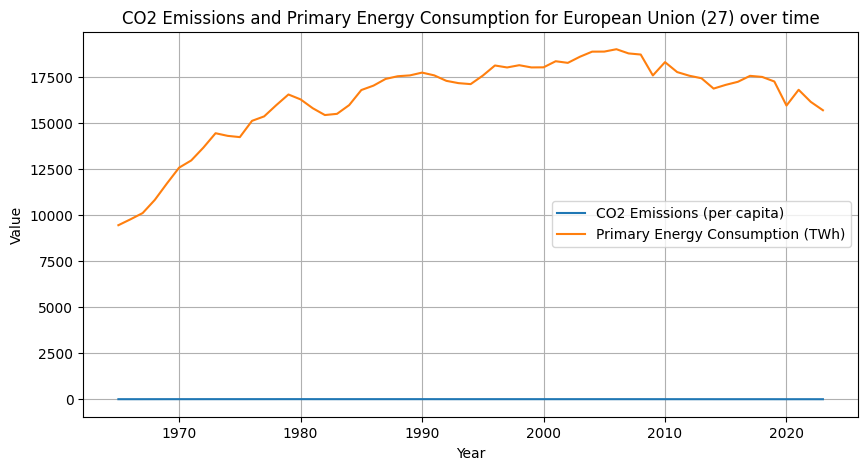

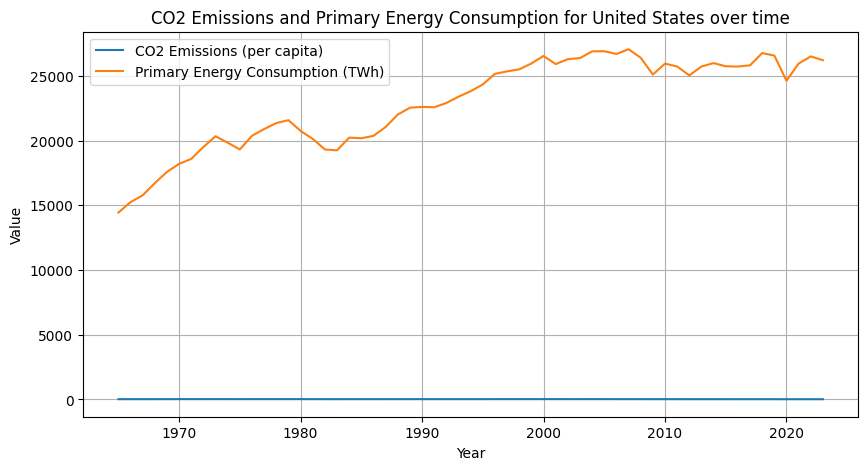

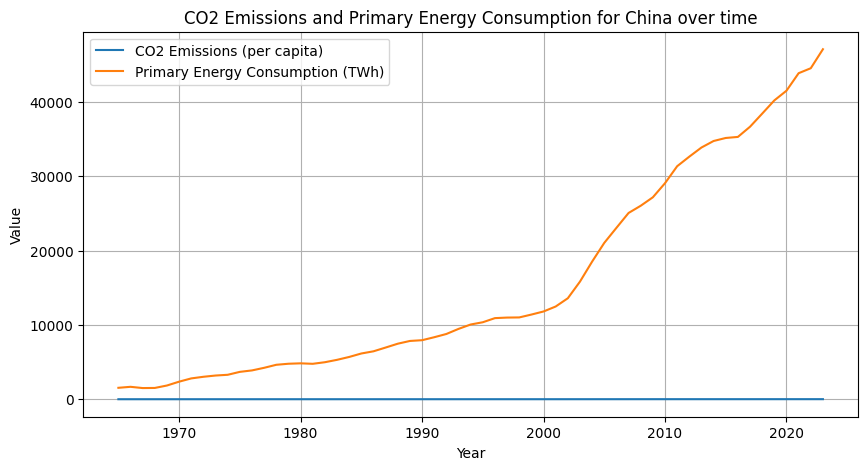

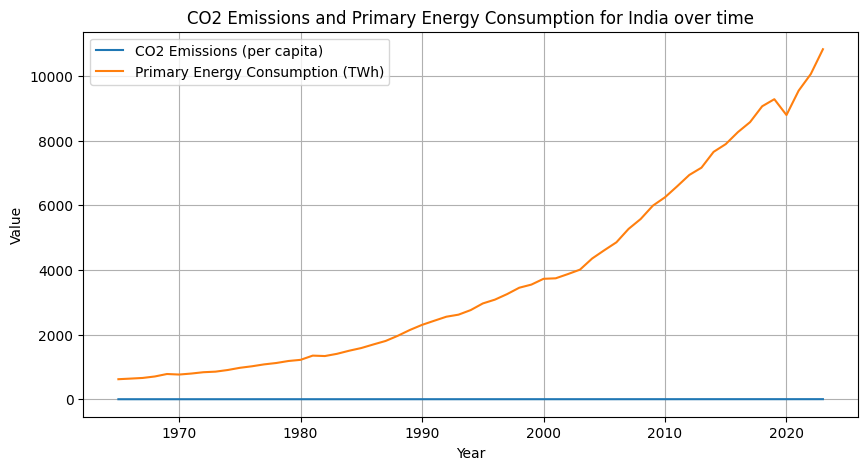

In [26]:
def plot_energy_data(dataframe, country_name):
    plt.figure(figsize=(10, 5))
    plt.plot(dataframe['Year'], dataframe['Annual CO₂ emissions (per capita)'], label='CO2 Emissions (per capita)')
    plt.plot(dataframe['Year'], dataframe['Primary energy consumption (TWh)'], label='Primary Energy Consumption (TWh)')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(f'CO2 Emissions and Primary Energy Consumption for {country_name} over time')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_energy_data(df_ue, 'European Union (27)')
plot_energy_data(df_usa, 'United States')
plot_energy_data(df_ch, 'China')
plot_energy_data(df_in, 'India')